In [3]:
from TSInterpret.data import load_data
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, UCRDataset

# Parameters

In [4]:
dataset='GunPoint'

# Load Data

In [5]:
#TODO include OneHot Encoding Options
train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='feat',cwd='/media/jacqueline/Data/UCRArchive_2018/')

In [6]:
print(test_y.shape)

(150,)


In [8]:
#enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
enc1=pickle.load(open(f'../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','rb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

# Model Training

In [9]:
n_pred_classes =train_y.shape[1]
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)
model = ResNetBaseline(in_channels=1, num_pred_classes=n_pred_classes)
model.load_state_dict(torch.load(f'../ClassificationModels/models/{dataset}/ResNet'))
model.eval()
#fit(model,train_loader,test_loader)
#if dataset in os.listdir('./ClassificationModels/models/'):
#    print('Folder exists')
#else: 
#    os.mkdir(f'./ClassificationModels/models/{dataset}')
#torch.save(model.state_dict(), f'./ClassificationModels/models/{dataset}/ResNet')

#test_preds, ground_truth = get_all_preds(model, test_loader)
#ground_truth=np.argmax(ground_truth,axis=1)

#sns.set(rc={'figure.figsize':(5,4)})
#heatmap=confusion_matrix(ground_truth, test_preds)
#sns.heatmap(heatmap, annot=True)
#plt.savefig(f'./ClassificationModels/models/{dataset}/ResNet_confusion_matrix.png')
#plt.close()
#acc= accuracy_score(ground_truth, test_preds)
#a = classification_report(ground_truth, test_preds, output_dict=True)
#dataframe = pd.DataFrame.from_dict(a)
#dataframe.to_csv(f'./ClassificationModels/models/{dataset}/classification_report.csv', index = False)

ResNetBaseline(
  (layers): Sequential(
    (0): ResNetBlock(
      (layers): Sequential(
        (0): ConvBlock(
          (layers): Sequential(
            (0): Conv1dSamePadding(1, 64, kernel_size=(8,), stride=(1,))
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
        )
        (1): ConvBlock(
          (layers): Sequential(
            (0): Conv1dSamePadding(64, 64, kernel_size=(5,), stride=(1,))
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
        )
        (2): ConvBlock(
          (layers): Sequential(
            (0): Conv1dSamePadding(64, 64, kernel_size=(3,), stride=(1,))
            (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
          )
        )
      )
      (residual): Sequential(
        (0): Conv1dSamePadding(1, 64, kernel_size=(1,)

# Explanation Algo

In [10]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = 'Lime'
transform_name = 'straight_line'
model_to_explain=model

In [13]:
from TSInterpret.InterpretabilityModels.leftist.leftist import LEFTIST
from TSInterpret.InterpretabilityModels.leftist.timeseries.segmentator.uniform_segmentator import UniformSegmentator

In [14]:
segmentator = UniformSegmentator(nb_interpretable_feature)
leftist = LEFTIST(model_to_explain,(test_x,None),mode='feat', backend='PYT')
#(test_x,'straight_line',segmentator,model_to_explain,learning_process_name,mode='feat', backend='torch')

In [15]:
explanations = leftist.explain(np.array(explained_instance),1000,explanation_size=explanation_size)

Instance (1, 150)
nb_features 10
nb_neighbors 1000
NM [[1 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 0]
 [1 1 1 ... 0 1 0]
 [0 1 1 ... 1 1 1]]
masks : 
 [[1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 0]
 [1 1 1 ... 0 1 0]
 [0 1 1 ... 1 1 1]] 
 kernel_weights : 
 None 
 values : 
 None 
 proba_labels : 
 None 
 


ValueError: could not broadcast input array from shape (16,1) into shape (1,150)

In [ ]:
for i in range(len(explanations)):
    print('class{} : '.format(i),explanations[i][0])

class0 :  [-4.72941720e-07 -1.16834867e-10 -1.77356311e-11  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.86029478e-11  1.94125752e-10]
class1 :  [-1.94125752e-10 -9.86029478e-11  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77356311e-11
  1.16834867e-10  4.72941720e-07]


[-4.72941720e-07 -1.16834867e-10 -1.77356311e-11  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.86029478e-11  1.94125752e-10]
-4.72941720059013e-07
0.0
-1.168348672894354e-10
15.0
-1.77356310616398e-11
30.0
0.0
45.0
0.0
60.0
0.0
75.0
0.0
90.0
0.0
105.0
9.8602947760425e-11
120.0
1.9412575173537976e-10
135.0


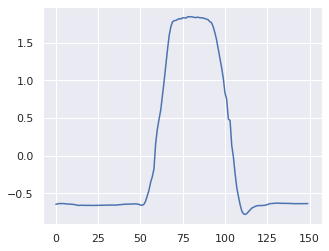

In [ ]:
leftist.plot_on_sample(explained_instance.flatten(),explanations)